# **Automatidata project**

# **1. Plan**

New York City TLC is an agency responsible for licensing and regulating New York City's taxi cabs and for-hire vehicles. The agency want to develop a regression model that helps estimate taxi fares before the ride, based on data that TLC has gathered. 

The TLC data comes from over 200,000 taxi and limousine licensees, making approximately one million combined trips per day. 

The goals in this project are to analyze the data from New York City and Limousine Commission (NYC TLC) and to build a machine learning model to predict if a customer will not leave a tip.

### Overview

The DataFrame contains **22,699 entries** and **19 columns**. Here’s a summary of the columns:

1. **Unnamed: 0**: Index or identifier, generally not relevant for analysis.
2. **VendorID**: Taxi provider identifier.
3. **tpep_pickup_datetime**: Pickup date and time.
4. **tpep_dropoff_datetime**: Drop-off date and time.
5. **passenger_count**: Number of passengers.
6. **trip_distance**: Distance of the trip.
7. **RatecodeID**: Fare code.
8. **store_and_fwd_flag**: Indicates if the trip was stored for later processing.
9. **PULocationID**: Pickup location identifier.
10. **DOLocationID**: Drop-off location identifier.
11. **payment_type**: Type of payment (cash, credit card, etc.).
12. **fare_amount**: Fare amount.
13. **extra**: Additional charges (surcharges, etc.).
14. **mta_tax**: MTA tax.
15. **tip_amount**: Tip amount.
16. **tolls_amount**: Tolls amount.
17. **improvement_surcharge**: Improvement surcharge.
18. **total_amount**: Total amount (sum of all charges).
19. **duration**: Duration of the trip.

### **1.1 Imports**

 
* ### Packages

In [320]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle


* ### Load dataset

In [321]:
# Load dataset into dataframe
df0 = pd.read_csv(r"E:\coursera\Google Advanced DATA ANALYST\C_6 Machine learning\Work Scenario\Automatidata\Activities\2017_Yellow_Taxi_Trip_Data.csv")

# display first rows ofthe dataframe
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


## **1.2. Data Explortation (Initial EDA and data cleaning)**

In [322]:
# Gather basic information about data

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

* Check for missing data and duplicates

In [323]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()

# Check for duplicates
print('Shape of dataframe:', df0.shape)
print('Shape of dataframe with duplicates dropped:', df0.drop_duplicates().shape)
# Check for missing values in dataframe
print('Total count of missing values:', df0.isna().sum().sum())
# Display missing values per column in dataframe
print('Missing values per column:')
df0.isna().sum()


Shape of dataframe: (22699, 18)
Shape of dataframe with duplicates dropped: (22699, 18)
Total count of missing values: 0
Missing values per column:


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

* There are no missing or duplicated values in the data

In [324]:
#Descriptive statistics
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


For instance, there are clearly some outliers in several variables, like tip_amount ($200) and total_amount ($1,200).
Also, a number of the variables, such as mta_tax, seem to be almost constant throughout the data,
which would imply that they would not be expected to be very predictive.

* Convert pickup & dropoff columns to datetime

In [325]:
df0['tpep_dropoff_datetime'][0]

'03/25/2017 9:09:47 AM'

In [326]:
# Convert datetime columns to datetime

print('Date type of tpep_pickup_datetime:',df0['tpep_pickup_datetime'].dtype)
print('Date type of tpep_dropoff_datetime:',df0['tpep_dropoff_datetime'].dtype)

# Convert to datetime

df0['tpep_dropoff_datetime'] =pd.to_datetime(df0['tpep_dropoff_datetime'],format ='%m/%d/%Y %I:%M:%S %p')
df0['tpep_pickup_datetime'] =pd.to_datetime(df0['tpep_pickup_datetime'],format ='%m/%d/%Y %I:%M:%S %p')

print('Date type of tpep_pickup_datetime:',df0['tpep_pickup_datetime'].dtype)
print('Date type of tpep_dropoff_datetime:',df0['tpep_dropoff_datetime'].dtype)

Date type of tpep_pickup_datetime: object
Date type of tpep_dropoff_datetime: object
Date type of tpep_pickup_datetime: datetime64[ns]
Date type of tpep_dropoff_datetime: datetime64[ns]


In [327]:
df0.head(3)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75


Create duration column

In [328]:
# Duration column
df0['duration'] =(df0['tpep_dropoff_datetime']-df0['tpep_pickup_datetime'])/np.timedelta64(1,'m')

In [329]:
df0.head(3)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000


Outliers

In [330]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

# **2. Analyze**

## **2.1 Data Explortation (Continue EDA)**

Relation  between payment type and fare amount

In [331]:
df0.groupby('payment_type')['fare_amount'].mean()

payment_type
1    13.429748
2    12.213546
3    12.186116
4     9.913043
Name: fare_amount, dtype: float64

1. customers who are required to pay with credit card\
2. customers who are required to pay with cash

Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger fare amount than customers who pay in cash. However, this difference might arise from random sampling, rather than being a true difference in fare amount. To assess whether the difference is
statistically significant, I conduct a hypothesis test.


**Hypothesis testing**
* Null hypothesis: There is no difference in average fare amountbetween customers
who use credit cards and customers who use cash. 
* Alternative hypothesis: There is a difference
in average fare between customers who use credit cards and customers who use cash

In [332]:
# Hypothesis test A/B test

credit_card = df0[df0['payment_type']==1]['fare_amount']
cash = df0[df0['payment_type']==2]['fare_amount']
stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

TtestResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12, df=16675.48547403633)

In [333]:
print('credit_card :', credit_card.shape, '/ cash:', cash.shape)

credit_card : (15265,) / cash: (7267,)


The p-value of the test is significantly smaller the 5%, significance level; we reject the null hypothesis.\
There is a statisticaly significant difference in the average fare amount between customers who use credit cards and customers who use cash.

The key business insight is that encouraging customers to pay with
credit cards can generate more revenue for taxi cab drivers.

### **2.1.1 Data visualization**

* **Boxplots**

trip_distance

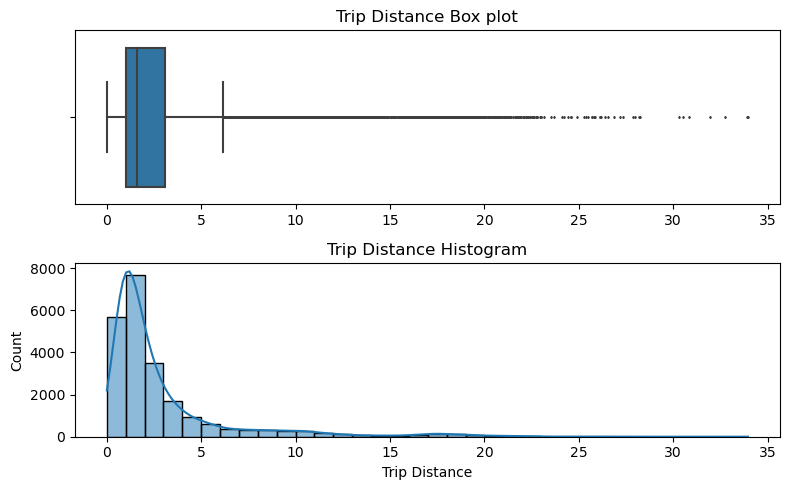

In [334]:
# Create subplots
fig, axis = plt.subplots(2, 1, figsize=(8, 5))

# Boxplot for trip_distance
sns.boxplot(data=df0, x='trip_distance', fliersize=1, ax=axis[0])
axis[0].set_title('Trip Distance Box plot')
axis[0].set_xlabel(None)

# Histogram for trip_distance
sns.histplot(data=df0, x='trip_distance', ax=axis[1], bins=range(0,26,1), kde=True)
axis[1].set_title('Trip Distance Histogram')
axis[1].set_xlabel('Trip Distance')


# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

The majority of trips were journeys of less than two miles.\
The number of trips falls away steeply as the distance traveled increases beyond two miles.

Total amount

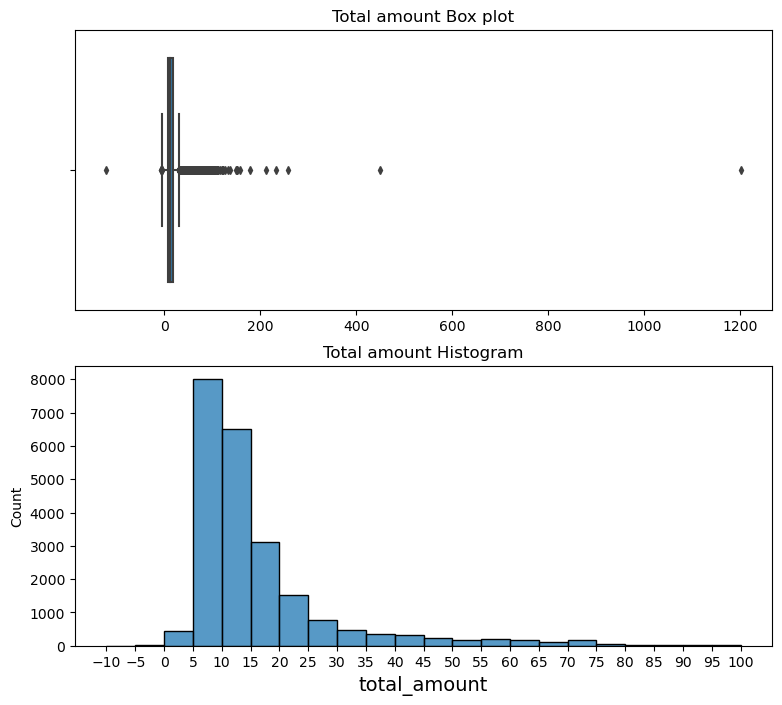

In [335]:
#create subplots
fig, axis =plt.subplots(2,1, figsize=(9, 8))

#boxplot
ab=sns.boxplot(data=df0, x='total_amount', ax=axis[0], fliersize=4)
ab.set_title('Total amount Box plot')
ab.set_xlabel(None)
#histplot
ax=sns.histplot(data=df0, x='total_amount', ax=axis[1], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xlabel('total_amount',fontsize=14)
ax.set_title('Total amount Histogram')
plt.show()

The total cost of each trip also has a distribution that skews right, with most
costs falling in the $5-15 range.

Tip amount

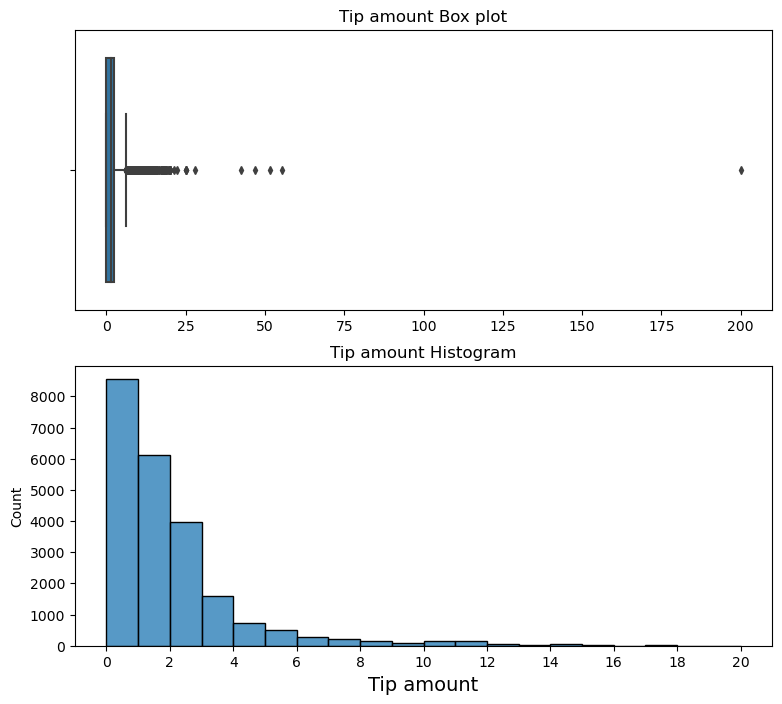

In [336]:
# Create subplots
fig, axis = plt.subplots(2, 1, figsize=(9,8))

#Box plot
ab=sns.boxplot(data=df0, x='tip_amount', ax=axis[0], fliersize=4)
ab.set_xlabel(None)
ab.set_title('Tip amount Box plot')

#Histogram
ax=sns.histplot(data=df0, x='tip_amount', bins=range(0, 21, 1), ax=axis[1])
ax.set_xticks(range(0, 21, 2))
ax.set_xlabel('Tip amount', fontsize=14)
ax.set_title('Tip amount Histogram')

plt.show()


Fare amount

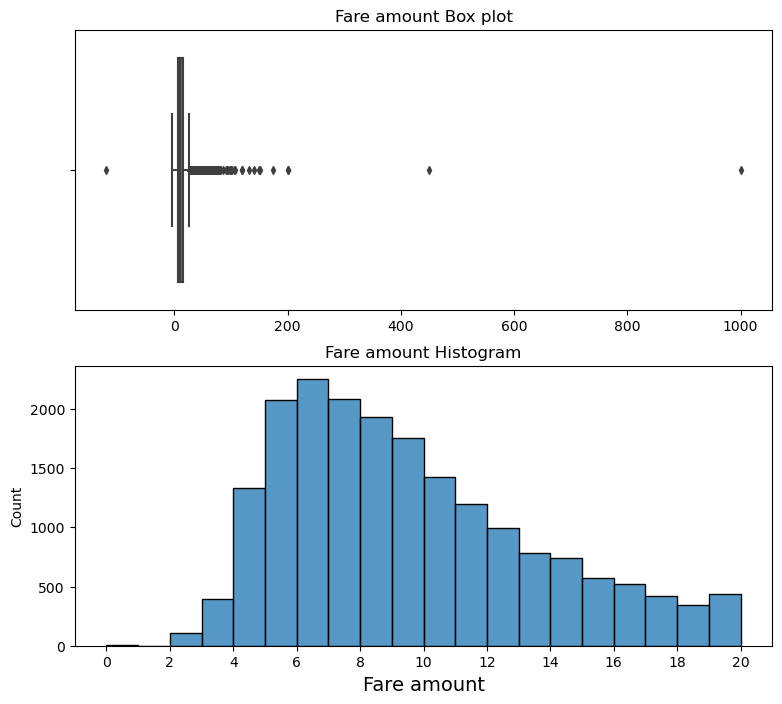

In [337]:
# Create subplots
fig, axis = plt.subplots(2, 1, figsize=(9,8))

#Box plot
ab=sns.boxplot(data=df0, x='fare_amount', ax=axis[0], fliersize=4)
ab.set_xlabel(None)
ab.set_title('Fare amount Box plot')

#Histogram
ax=sns.histplot(data=df0, x='fare_amount', bins=range(0, 21, 1), ax=axis[1])
ax.set_xticks(range(0, 21, 2))
ax.set_xlabel('Fare amount', fontsize=14)
ax.set_title('Fare amount Histogram')

plt.show()


The distribution for tip amount is right-skewed, with nearly all the tips in the
$0-3 range.

Tip_amount by vendor

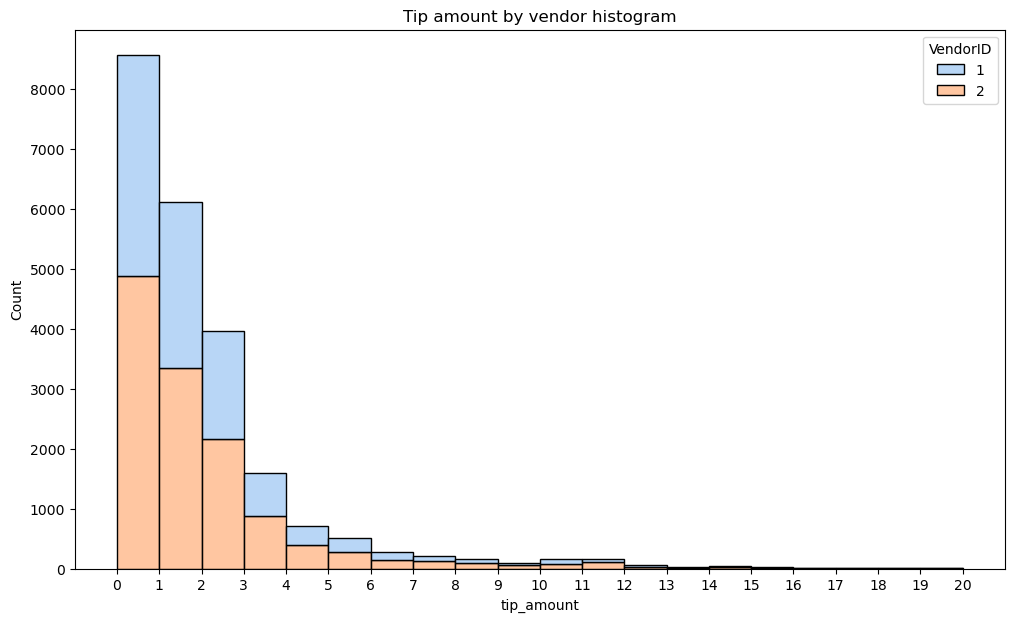

In [338]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df0, x='tip_amount', bins=range(0,21,1),
hue='VendorID',
multiple='stack',
palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

Separating the tip amount by vendor reveals that there are no noticeable aberrations in the distribution of tips between the two vendors in the dataset. Vendor two has a slightly
higher share of the rides, and this proportion is approximately maintained for all tip amounts.


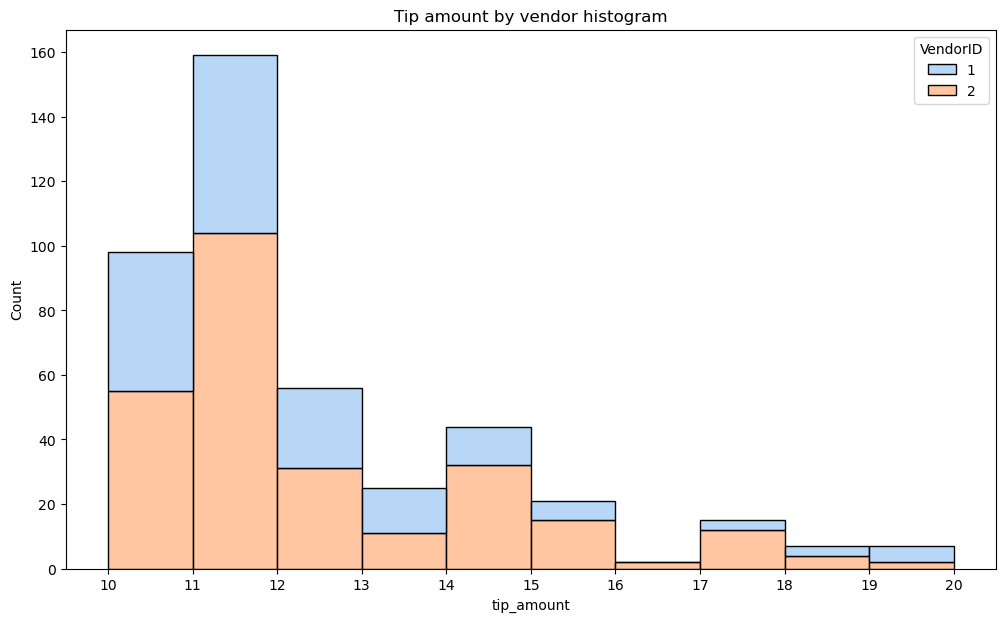

In [339]:
# Create histogram of tip_amount by vendor for tips > $10
tips_over_ten = df0[df0['tip_amount'] > 10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1),
hue='VendorID',
multiple='stack',
palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram');

The proportions are maintained even at these higher tip amounts, with the
exception being at highest extremity, but this is not noteworthy due to the low sample size at these
tip amounts.


Mean tips by passenger count

In [340]:
df0['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

Nearly two thirds of the rides were single occupancy, though there were still
nearly 700 rides with as many as six passengers. Also, there are 33 rides with an occupancy count
of zero, which doesn’t make sense.

In [341]:
df0.groupby(['passenger_count'])['tip_amount'].sum()/df0['tip_amount'].sum()*100

passenger_count
0     0.169137
1    71.511313
2    14.723473
3     3.926240
4     1.670898
5     5.138060
6     2.860880
Name: tip_amount, dtype: float64

Overall, the data suggests that as the number of passengers increases, the mean tip amount generally decreases, with one-passenger rides generating the highest tips. This could be due to various factors such as trip fare, service quality, and the dynamics of group tipping behavior. The sharp drop in tips for larger groups may indicate that passengers in those situations are more likely to split costs rather than tip generously.

In [342]:
# Calculate mean tips by passenger_count
mean_tips_by_passenger_count = df0.groupby(['passenger_count'])['tip_amount'].mean()
mean_tips_by_passenger_count

passenger_count
0    2.135758
1    1.848920
2    1.856378
3    1.716768
4    1.530264
5    1.873185
6    1.720260
Name: tip_amount, dtype: float64

In [343]:
# Calculer la moyenne des pourboires par nombre de passagers
mean_tips_by_passenger_count = df0.groupby(['passenger_count'])['tip_amount'].mean().reset_index()

# Renommer la colonne pour plus de clarté
mean_tips_by_passenger_count.columns = ['passenger_count', 'mean_tip_amount']

# Afficher le résultat
print(mean_tips_by_passenger_count)

   passenger_count  mean_tip_amount
0                0         2.135758
1                1         1.848920
2                2         1.856378
3                3         1.716768
4                4         1.530264
5                5         1.873185
6                6         1.720260


Text(0.5, 0, 'passenger count')

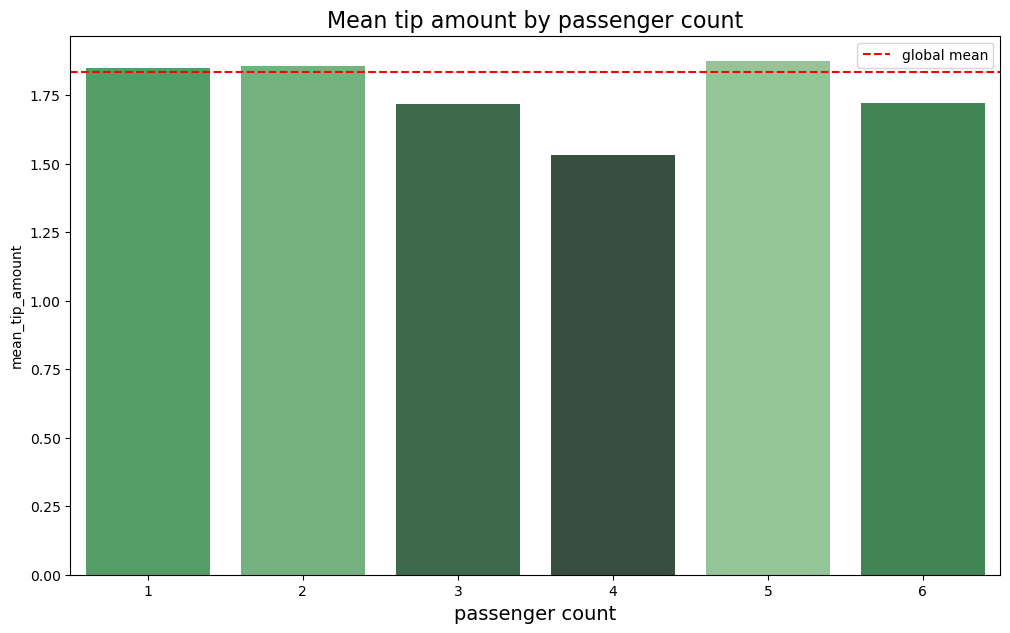

In [344]:
# Create bar plot for mean tips by passenger count
data = mean_tips_by_passenger_count.tail(-1)
pal = sns.color_palette("Greens_d", len(data))
rank = data['mean_tip_amount'].argsort().argsort()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index, y=data['mean_tip_amount'], palette=np.array(pal[::-1])[rank])
ax.axhline(df0['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean tip amount by passenger count', fontsize=16);
ax.set_xlabel('passenger count',fontsize=14)

* Create monthly and day columns

In [345]:
# create a month column
df0['month']=df0['tpep_pickup_datetime'].dt.month_name()

# create a day column
df0['day']=df0['tpep_pickup_datetime'].dt.day_name()

In [346]:
 # Get total number of rides for each month
monthly_rides = df0['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

In [347]:
# Reorder the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
'August', 'September', 'October', 'November', 'December']
monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

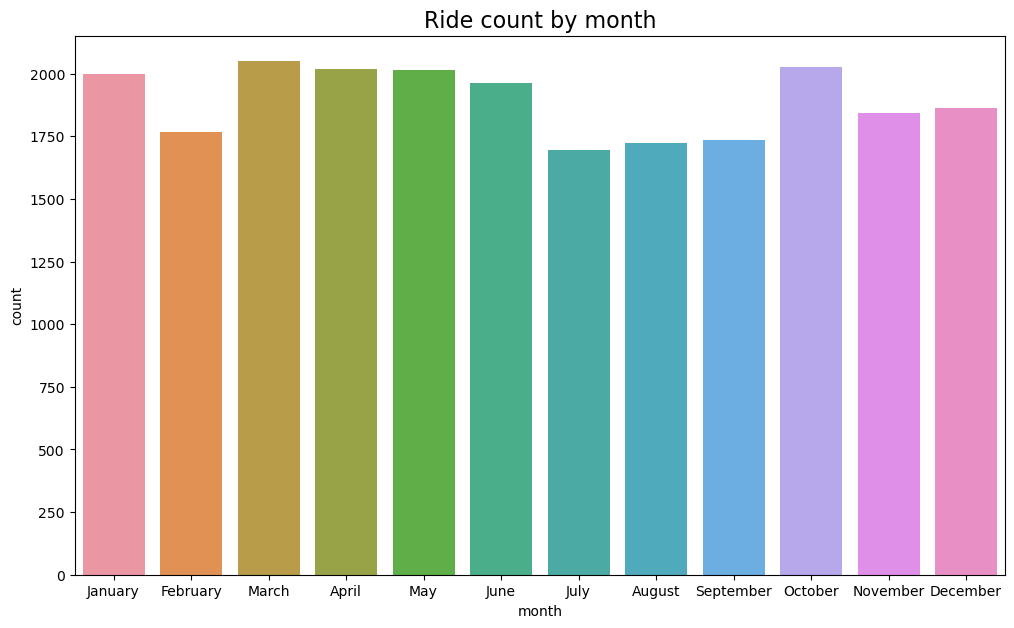

In [348]:
 # Create a bar plot of total rides per month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize=16);


Monthly rides are fairly consistent, with notable dips in the summer months of
July, August, and September, and also in February.

In [349]:
 # Get total number of rides for each month
day_rides = df0['day'].value_counts()
day_rides

day
Friday       3413
Thursday     3402
Wednesday    3390
Saturday     3367
Tuesday      3198
Sunday       2998
Monday       2931
Name: count, dtype: int64

In [350]:
# Reorder the monthly ride list so months go in order
daily_rides = df0['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

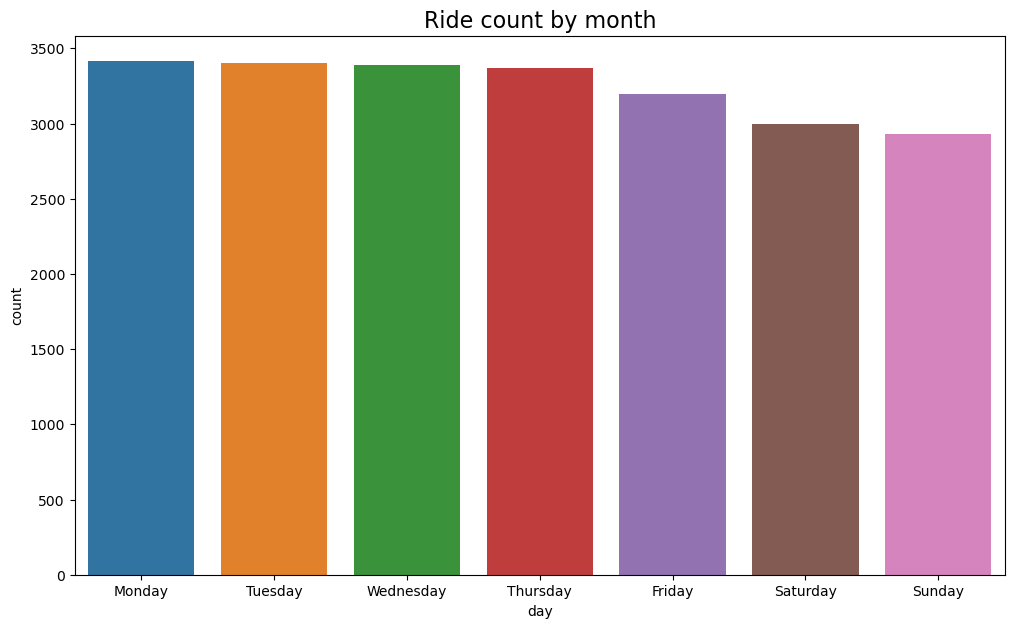

In [351]:
 # Create a bar plot of total rides per month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=day_rides.index, y=day_rides)
ax.set_xticklabels(day_order)
plt.title('Ride count by month', fontsize=16);


 Suprisingly, Wednesday through Saturday had the highest number of daily rides,
while Sunday and Monday had the least.


Total revenue by day of the week

In [352]:
# Calculer la moyenne des pourboires par nombre de passagers
mean_tips_by_passenger_count = df0.groupby(['passenger_count'])['tip_amount'].mean().reset_index()

# Renommer la colonne pour plus de clarté
mean_tips_by_passenger_count.columns = ['passenger_count', 'mean_tip_amount']

# Afficher le résultat
print(mean_tips_by_passenger_count)

   passenger_count  mean_tip_amount
0                0         2.135758
1                1         1.848920
2                2         1.856378
3                3         1.716768
4                4         1.530264
5                5         1.873185
6                6         1.720260


In [353]:
# Define the order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate total revenue by day
total_amount_day = df0.groupby('day')['total_amount'].sum()

# Create a new DataFrame with 'day' and 'total_amount'
total_amount_day_df = total_amount_day.reset_index()

# Rename the columns
total_amount_day_df.columns = ['day', 'total_amount']

# Reindex to ensure the days are in the correct order
total_amount_day_df = total_amount_day_df.set_index('day').reindex(day_order).reset_index()

# Display the resulting DataFrame
print(total_amount_day_df)

         day  total_amount
0     Monday      49574.37
1    Tuesday      52527.14
2  Wednesday      55310.47
3   Thursday      57181.91
4     Friday      55818.74
5   Saturday      51195.40
6     Sunday      48624.06


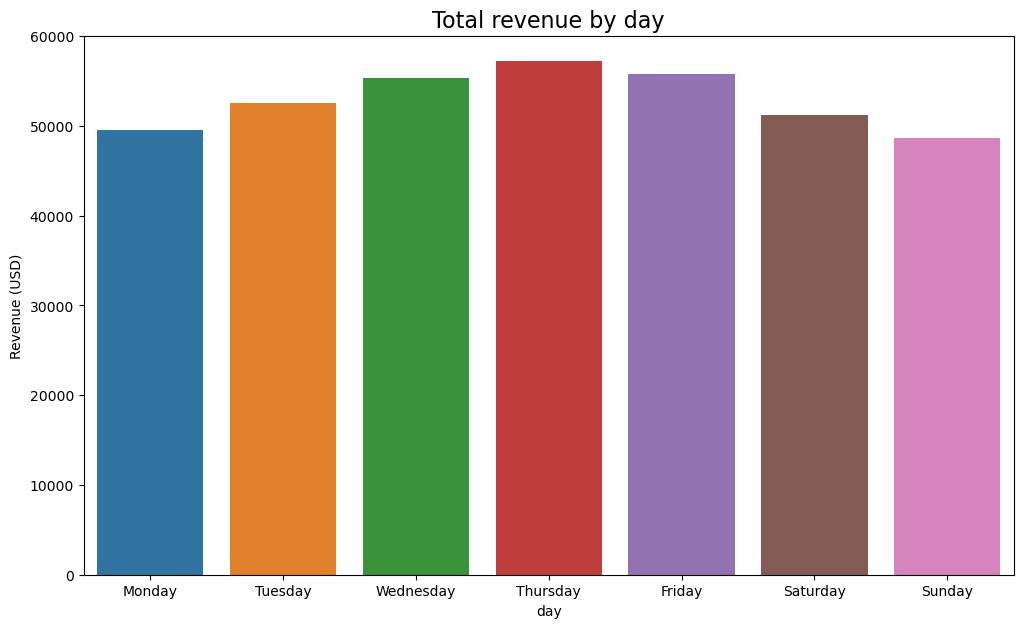

In [354]:
 # Create bar plot of total revenue by day
plt.figure(figsize=(12,7))
ax = sns.barplot(data=total_amount_day_df, x='day', y='total_amount')
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day', fontsize=16);


Thursday had the highest gross revenue of all days, and Sunday and Monday
had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross
revenue was ~$6,000 less than Thursday’s—more than a 10% drop.


Plot total revenue by month

In [355]:
# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
'August', 'September', 'October', 'November', 'December']
# Calculate total revenue by month
total_amount_month = df0.groupby('month')['total_amount'].sum()

# Create a new DataFrame with 'month' and 'total_amount'
total_amount_month_df = total_amount_month.reset_index()

# Rename the columns
total_amount_month_df.columns = ['month', 'total_amount']

# Reindex to ensure the month are in the correct order
total_amount_month_df = total_amount_month_df.set_index('month').reindex(month_order).reset_index()

# Display the resulting DataFrame
print(total_amount_month_df)

        month  total_amount
0     January      31735.25
1    February      28937.89
2       March      33085.89
3       April      32012.54
4         May      33828.58
5        June      32920.52
6        July      26617.64
7      August      27759.56
8   September      28206.38
9     October      33065.83
10   November      30800.44
11   December      31261.57


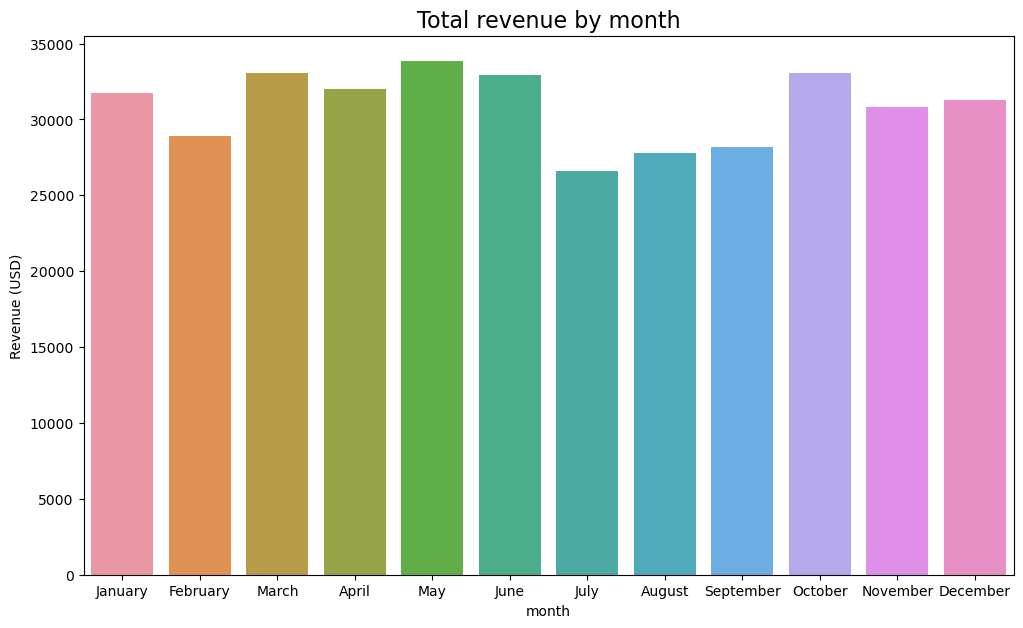

In [356]:
 # Create bar plot of total revenue by month
plt.figure(figsize=(12,7))
ax = sns.barplot(data=total_amount_month_df, x='month', y='total_amount')
ax.set_xticklabels(month_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by month', fontsize=16);


Monthly revenue generally follows the pattern of monthly rides, with noticeable
dips in the summer months of July, August, and September, and also one in February.

Plot mean trip distance by drop-off location

In [357]:
 # Get number of unique drop-off location IDs
df0['DOLocationID'].nunique()

216

In [358]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df0.groupby('DOLocationID')['trip_distance'].mean()

distance_by_dropoff = distance_by_dropoff.reset_index()

# Rename the columns
distance_by_dropoff.columns = ['DOLocationID', 'trip_distance']

distance_by_dropoff=distance_by_dropoff.sort_values(by='trip_distance')

# Display the resulting DataFrame
print(distance_by_dropoff)

     DOLocationID  trip_distance
164           207       1.200000
154           193       1.390556
192           237       1.555494
189           234       1.727806
109           137       1.818852
..            ...            ...
40             51      17.310000
5              11      17.945000
167           210      20.500000
21             29      21.650000
16             23      24.275000

[216 rows x 2 columns]


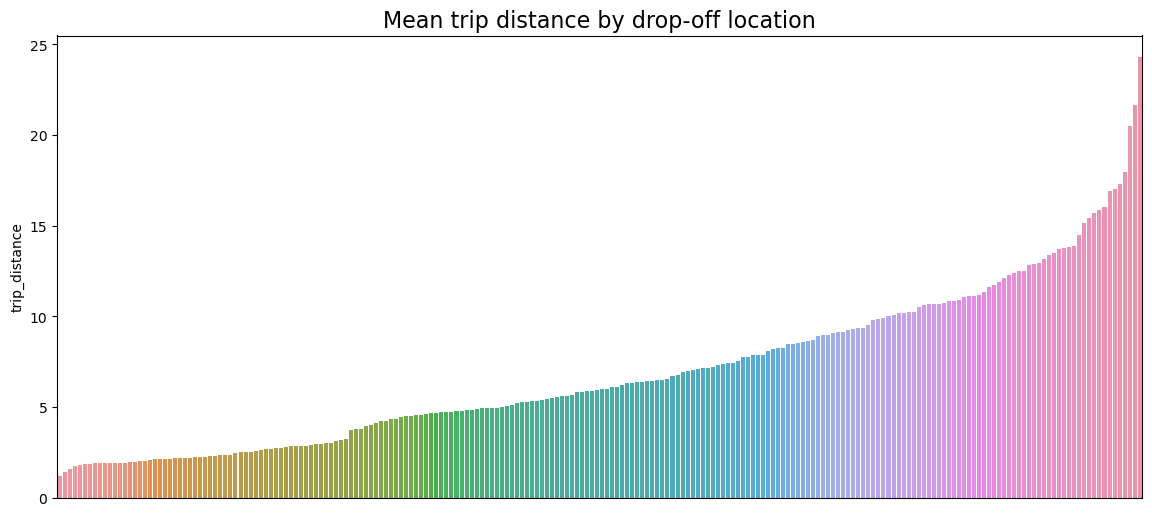

In [359]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index, y=distance_by_dropoff['trip_distance'], order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

This plot presents a characteristic curve related to the cumulative density function of a normal distribution. In other words, it indicates that the drop-off points are relatively
evenly distributed over the terrain. This is good to know, because geographic coordinates were 

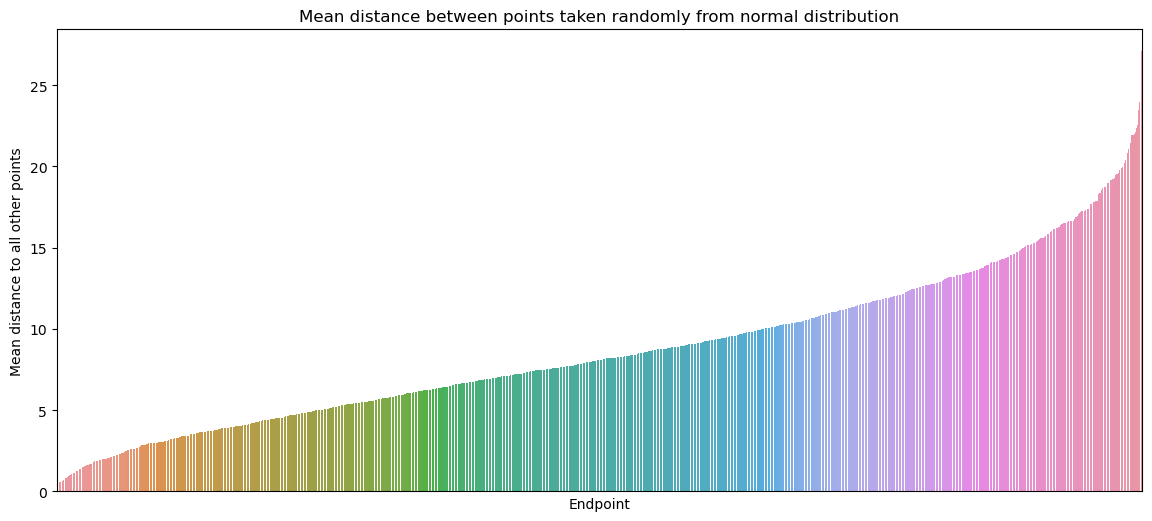

In [360]:
# 1. Generate random points on a 2D plane from a normal distribution
test = np.round(np.random.normal(10, 5, (3000, 2)), 1)
midway = int(len(test)/2) # Calculate midpoint of the array of coordinates
start = test[:midway] # Isolate first half of array ("pick-up locations")
end = test[midway:] # Isolate second half of array ("drop-off locations")
# 2. Calculate Euclidean distances between points in first half and second half of array
distances = (start - end)**2
distances = distances.sum(axis=-1)
distances = np.sqrt(distances)
# 3. Group the coordinates by "drop-off location", compute mean distance
test_df = pd.DataFrame({'start': [tuple(x) for x in start.tolist()],
'end': [tuple(x) for x in end.tolist()],
'distance': distances})
data = test_df[['end', 'distance']].groupby('end').mean()
data = data.sort_values(by='distance')
# 4. Plot the mean distance between each endpoint ("drop-off location") and all points it connected to
plt.figure(figsize=(14,6))
ax = sns.barplot(x=data.index,
y=data['distance'],
order=data.index)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel('Endpoint')
ax.set_ylabel('Mean distance to all other points')
ax.set_title('Mean distance between points taken randomly from normal distribution');

The curve described by this graph is nearly identical to that of the mean distance
traveled by each taxi ride to each drop-off location. This reveals that the drop-off locations in the
taxi dataset are evenly distributed geographically.

Histogram of rides by drop-off location

In [361]:
# Check if all drop-off locations are consecutively numbered
df0['DOLocationID'].max() - len(set(df0['DOLocationID']))

49

 There are 49 numbers that do not represent a drop-off location.

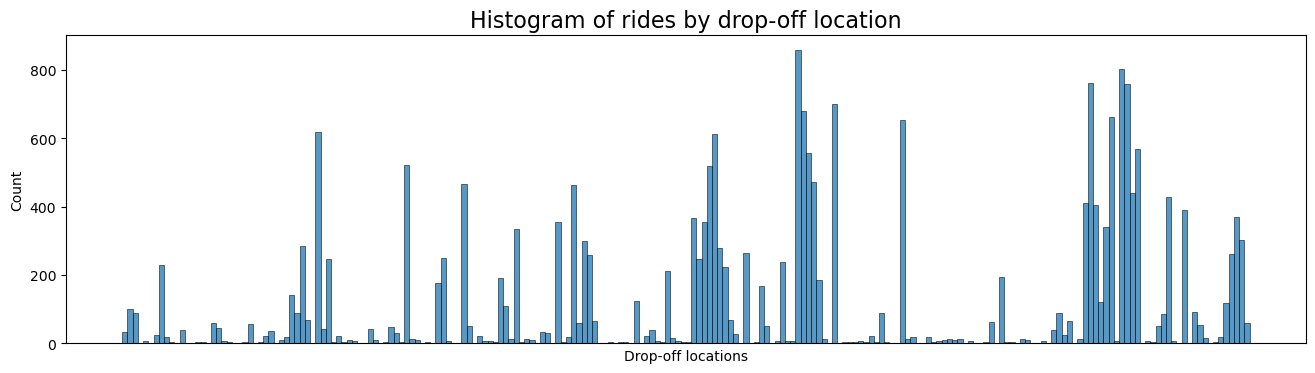

In [362]:
plt.figure(figsize=(16,4))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df0['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(sorted_dropoffs, bins=range(0, df0['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

Notice that out of the 200+ drop-off locations, a disproportionate number of
locations receive the majority of the traffic, while all the rest get relatively few trips. It’s likely
that these high-traffic locations are near popular tourist attractions like the Empire State Building
or Times Square, airports, and train and bus terminals. However, it would be helpful to know the
location that each ID corresponds with. Unfortunately, this is not in the data.


# **2.2 Feature engineering**

* Gather basic information about data

In [363]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

**Check outliers**

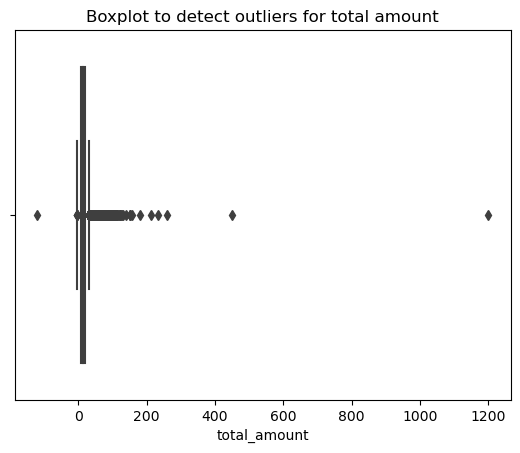

In [364]:
# Check outliers
sns.boxplot(data=df0, x="total_amount")
plt.title("Boxplot to detect outliers for total amount")
plt.show()

The boxplot above shows that there are outliers in the total amount variable.

It would be helpful to investigate how many rows in the data contain outliers  in this variable.

In [365]:
# Determine the number of rows containing outliers

iqr= df0.total_amount.quantile(0.75)-df0.total_amount.quantile(0.25)

lower_limit=df0.total_amount.quantile(0.25) - 1.5*iqr
upper_limit=df0.total_amount.quantile(0.75) + 1.5*iqr


print(lower_limit, upper_limit )
outliers=df0[(df0["total_amount"]<lower_limit) | (df0["total_amount"]>upper_limit)]

print("lower_limit", lower_limit)
print("upper_limit", upper_limit)
print('Number of rows in the data contains outliers in total_amount is :',len(outliers))

-4.825000000000001 31.375
lower_limit -4.825000000000001
upper_limit 31.375
Number of rows in the data contains outliers in total_amount is : 2161


Certains types of models are more sensitive to outliers than others. 

In [366]:
len(df0[(df0["total_amount"]<lower_limit) | (df0["total_amount"]>upper_limit)])

2161

In [367]:
df0.payment_type.value_counts()

payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64

In [368]:
print('tip amount by payment_type :\n' , 
      '1 :', df0[df0['payment_type']==1]['tip_amount'].sum(),
      '\n', '2 :', df0[df0['payment_type']==2]['tip_amount'].sum(),
      '\n', '3 :', df0[df0['payment_type']==3]['tip_amount'].sum(),
      '\n', '4 :', df0[df0['payment_type']==4]['tip_amount'].sum())

tip amount by payment_type :
 1 : 41670.4 
 2 : 0.0 
 3 : 0.0 
 4 : 0.0


Only customers who by credit card have a tip amount different to $0, so we need to sample the data to select only this customers.

Isolate customers who paid by card

In [369]:
# Subset the data to isolate only customers who paid by credit card
df1 = df0[df0['payment_type']==1]

* #### **Target**

There isn't a column that indicates tip percent, we have to engineer it. 

I add a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  

In [370]:
# Create tip % col
df1['tip_percent'] = round(df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount']), 3)

C:\Users\7MAKSACOD PC\AppData\Local\Temp\ipykernel_6680\1025802444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tip_percent'] = round(df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount']), 3)


I create `generous` column, this will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

In [371]:
# Create 'generous' col (target)
df1['generous'] = df1['tip_percent']
df1['generous'] = (df1['generous'] >= 0.2)
df1['generous'] = df1['generous'].astype(int)

C:\Users\7MAKSACOD PC\AppData\Local\Temp\ipykernel_6680\53023181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['generous'] = df1['tip_percent']
C:\Users\7MAKSACOD PC\AppData\Local\Temp\ipykernel_6680\53023181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['generous'] = (df1['generous'] >= 0.2)
C:\Users\7MAKSACOD PC\AppData\Local\Temp\ipykernel_6680\53023181.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

###  Day column

In [372]:
# Create a 'day' col
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()

C:\Users\7MAKSACOD PC\AppData\Local\Temp\ipykernel_6680\918047604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()


In [373]:
from warnings import filterwarnings

#### Time of day columns

Next, engineer four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

To do this, first create the four columns. For now, each new column should be identical and contain the same information: the hour (only) from the `tpep_pickup_datetime` column.

In [374]:
# Create 'am_rush' col
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'daytime' col
df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'pm_rush' col
df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'nighttime' col
df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour

C:\Users\7MAKSACOD PC\AppData\Local\Temp\ipykernel_6680\986325379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour
C:\Users\7MAKSACOD PC\AppData\Local\Temp\ipykernel_6680\986325379.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour
C:\Users\7MAKSACOD PC\AppData\Local\Temp\ipykernel_6680\986325379.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [375]:
# Define 'am_rush()' conversion function [06:00–10:00)
def am_rush(hour):
    if 6 <= hour['am_rush'] < 10:
        val = 1
    else:
        val = 0
    return val

In [376]:
# Apply 'am_rush' function to the 'am_rush' series
df1['am_rush'] = df1.apply(am_rush, axis=1)
df1['am_rush'].head()

C:\Users\7MAKSACOD PC\AppData\Local\Temp\ipykernel_6680\227023620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['am_rush'] = df1.apply(am_rush, axis=1)


0    1
1    0
2    1
3    0
5    0
Name: am_rush, dtype: int64

Write functions to convert the three remaining columns and apply them to their respective series.

In [377]:
# Define 'daytime()' conversion function [10:00–16:00)
def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        val = 1
    else:
        val = 0
    return val

In [378]:
# Apply 'daytime' function to the 'daytime' series
df1['daytime'] = df1.apply(daytime, axis=1)

C:\Users\7MAKSACOD PC\AppData\Local\Temp\ipykernel_6680\1985778239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['daytime'] = df1.apply(daytime, axis=1)


In [379]:
# Define 'pm_rush()' conversion function [16:00–20:00)
def pm_rush(hour):
    if 16 <= hour['pm_rush'] < 20:
        val = 1
    else:
        val = 0
    return val

In [380]:
# Apply 'pm_rush' function to the 'pm_rush' series
df1['pm_rush'] = df1.apply(pm_rush, axis=1)

C:\Users\7MAKSACOD PC\AppData\Local\Temp\ipykernel_6680\3651034778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pm_rush'] = df1.apply(pm_rush, axis=1)


In [381]:
# Define 'nighttime()' conversion function [20:00–06:00)
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        val = 1
    elif 0 <= hour['nighttime'] < 6:
        val = 1
    else:
        val = 0
    return val

In [382]:
# Apply 'nighttime' function to the 'nighttime' series
df1['nighttime'] = df1.apply(nighttime, axis=1)

C:\Users\7MAKSACOD PC\AppData\Local\Temp\ipykernel_6680\230608774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['nighttime'] = df1.apply(nighttime, axis=1)


In [383]:
df1.describe()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,tip_percent,generous,am_rush,daytime,pm_rush,nighttime
count,1.526500e+04,15265.000000,15265,15265,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.0,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15262.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000
mean,5.665784e+07,1.556371,2017-06-29 00:31:41.410022912,2017-06-29 00:47:59.799672320,1.622142,3.037661,1.046512,162.700229,161.979561,1.0,13.429748,0.340485,0.498133,2.729800,0.357659,0.299902,17.663577,16.306494,0.187812,0.526368,0.162463,0.280904,0.231772,0.324861
min,1.212700e+04,1.000000,2017-01-01 00:26:35,2017-01-01 00:36:12,0.000000,0.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.801105e+07,1.000000,2017-03-28 20:52:10,2017-03-28 21:15:06,1.000000,1.010000,1.000000,114.000000,113.000000,1.0,7.000000,0.000000,0.500000,1.350000,0.000000,0.300000,9.360000,7.016667,0.159000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.643358e+07,2.000000,2017-06-22 18:02:30,2017-06-22 18:12:59,1.000000,1.700000,1.000000,162.000000,162.000000,1.0,9.500000,0.000000,0.500000,2.000000,0.000000,0.300000,12.950000,11.550000,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,8.574208e+07,2.000000,2017-10-03 13:29:14,2017-10-03 14:10:50,2.000000,3.200000,1.000000,233.000000,233.000000,1.0,15.000000,0.500000,0.500000,3.050000,0.000000,0.300000,19.120000,18.716667,0.200000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.134668e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.920000,99.000000,265.000000,265.000000,1.0,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000,3.684000,1.000000,1.000000,1.000000,1.000000,1.000000
std,3.292166e+07,0.496828,NaN,NaN,1.273740,3.711069,0.841663,65.897730,69.964348,0.0,13.848964,0.462005,0.030497,3.036917,1.488434,0.005429,17.402754,47.851964,0.092378,0.499321,0.368887,0.449455,0.421978,0.468338


**mean_distance column**

In [385]:
# pickup_dropoff` column
df1['pickup_dropoff'] = df1['PULocationID'].astype(str) + ' ' + df1['DOLocationID'].astype(str)
df1['pickup_dropoff'].head(2)


C:\Users\7MAKSACOD PC\AppData\Local\Temp\ipykernel_6680\3367015347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pickup_dropoff'] = df1['PULocationID'].astype(str) + ' ' + df1['DOLocationID'].astype(str)


0    100 231
1     186 43
Name: pickup_dropoff, dtype: object

In [386]:
grouped = df1.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]

# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()
# dictionary
grouped_dict = grouped_dict['trip_distance']
# Create a mean_distance column
df1['mean_distance'] = df1['pickup_dropoff']
# `grouped_dict` to the `mean_distance` column
df1['mean_distance'] = df1['mean_distance'].map(grouped_dict)
# Confirmation
df1[(df1['PULocationID']==100) & (df1['DOLocationID']==231)][['mean_distance']]

C:\Users\7MAKSACOD PC\AppData\Local\Temp\ipykernel_6680\2004417801.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['mean_distance'] = df1['pickup_dropoff']
C:\Users\7MAKSACOD PC\AppData\Local\Temp\ipykernel_6680\2004417801.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['mean_distance'] = df1['mean_distance'].map(grouped_dict)


,mean_distance
0,3.2325
4909,3.2325
16636,3.2325
19761,3.2325


**Create mean_duration column**

In [388]:
grouped = df1.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped
# Create a dictionary 
# mean trip duration for all trips 
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']
df1['mean_duration'] = df1['pickup_dropoff']
df1['mean_duration'] = df1['mean_duration'].map(grouped_dict)
# Confirm that it ok
df1[(df1['PULocationID']==100) & (df1['DOLocationID']==231)][['mean_duration']]

C:\Users\7MAKSACOD PC\AppData\Local\Temp\ipykernel_6680\1570334311.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['mean_duration'] = df1['pickup_dropoff']
C:\Users\7MAKSACOD PC\AppData\Local\Temp\ipykernel_6680\1570334311.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['mean_duration'] = df1['mean_duration'].map(grouped_dict)


,mean_duration
0,16.225
4909,16.225
16636,16.225
19761,16.225


In [ ]:
df1.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'duration',
       'month', 'day', 'tip_percent', 'generous', 'am_rush', 'daytime',
       'pm_rush', 'nighttime', 'operational_eff', 'inv_operational_eff'],
      dtype='object')

#### Drop columns

Drop redundant and irrelevant columns as well as those that would not be available when the model is deployed. This includes information like payment type, trip distance, tip amount, tip percentage, total amount, toll amount, etc. The target variable (`generous`) must remain in the data because it will get isolated as the `y` data for modeling.

In [394]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  int64  
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  int64  
 3   PULocationID     15265 non-null  int64  
 4   DOLocationID     15265 non-null  int64  
 5   duration         15265 non-null  float64
 6   month            15265 non-null  object 
 7   day              15265 non-null  object 
 8   generous         15265 non-null  int32  
 9   am_rush          15265 non-null  int64  
 10  daytime          15265 non-null  int64  
 11  pm_rush          15265 non-null  int64  
 12  nighttime        15265 non-null  int64  
 13  pickup_dropoff   15265 non-null  object 
 14  mean_distance    15265 non-null  float64
 15  mean_duration    15265 non-null  float64
dtypes: float64(3), int32(1), int64(9), object(3)
memory usage: 1.9+

In [393]:
# Drop columns
drop_cols = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'payment_type', 'trip_distance', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount','duration',
             'improvement_surcharge', 'total_amount', 'tip_percent']

df1 = df1.drop(drop_cols, axis=1)
df1.info()

KeyError: "['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'payment_type', 'trip_distance', 'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'tip_percent'] not found in axis"

df1=df1

### **2.3 Variable encoding**

In [ ]:
# 1. Define list of cols to convert to string
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']

# 2. Convert each column to string
for col in cols_to_str:
    df1[col] = df1[col].astype('str')

C:\Users\7MAKSACOD PC\AppData\Local\Temp\ipykernel_6680\664194328.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].astype('str')
C:\Users\7MAKSACOD PC\AppData\Local\Temp\ipykernel_6680\664194328.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].astype('str')
C:\Users\7MAKSACOD PC\AppData\Local\Temp\ipykernel_6680\664194328.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [ ]:
df2.describe()

,passenger_count,duration,generous,daytime,nighttime,pricing_eff,l_fare_amount
count,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000
mean,1.616287,16.300966,0.528005,0.279962,0.323198,6.620103,2.336714
std,1.276090,47.852607,0.499231,0.448950,0.467670,47.857213,0.763185
min,0.000000,0.010000,0.000000,0.000000,0.000000,0.403226,-4.605170
25%,1.000000,7.000000,0.000000,0.000000,0.000000,4.247104,1.945910
50%,1.000000,11.550000,1.000000,0.000000,0.000000,5.405405,2.251292
75%,2.000000,18.716667,1.000000,1.000000,1.000000,6.875000,2.708050
max,6.000000,1439.550000,1.000000,1.000000,1.000000,5200.000000,6.907745


Now convert all the categorical columns to binary.


In [ ]:
# Convert categoricals to binary
df3 = pd.get_dummies(df2, drop_first=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Columns: 348 entries, passenger_count to day_wednesday
dtypes: bool(341), float64(6), int32(1)
memory usage: 5.8 MB


### **2.4 Evaluation metric**

Evaluation metric. 


In [ ]:
# Get class balance of 'generous' col
df3['generous'].value_counts(normalize=True)

generous
1    0.528005
0    0.471995
Name: proportion, dtype: float64

A little over half of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is very nearly balanced.

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.

**The stakes are relatively even. You want to help taxi drivers make more money, but you don't want this to anger customers. Your metric should weigh both precision and recall equally. Which metric is this?**

**Exemplar response:**  F<sub>1</sub> score is the metric that places equal weight on true postives and false positives, and so therefore on precision and recall.

# **3. Construct**


## **3.1 Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/testing data. 

1. Define a variable `y` that isolates the target variable (`generous`).
2. Define a variable `X` that isolates the features.
3. Split the data into training and testing sets, 20 % of test data.

In [ ]:
# Isolate target variable (y)
y = df3['generous']

# Isolate the features (X)
X = df3.drop('generous', axis=1)

# Split into train and test sets

X_train, X_tr, y_train, y_tr = train_test_split(X, y, stratify=y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_tr, y_tr, stratify=y_tr, test_size=0.5, random_state=42 )
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((9159, 347), (9159,), (3053, 347), (3053,), (3053, 347), (3053,))

## **3.2 Random forest**

In [ ]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune 
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [300]
             }

# 3. Define a set of scoring metrics to capture
scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1' : make_scorer(f1_score),
           'roc_auc': make_scorer(roc_auc_score)}

# 4. Instantiate the GridSearchCV object
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

Now fit the model to the training data.<br>  

In [ ]:
%%time
rf1.fit(X_train, y_train)

CPU times: total: 10min 3s
Wall time: 11min 1s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score),
                      'roc_auc': make_scorer(roc_auc_score)})

Examine the best average score across all the validation folds. 

In [ ]:
# Examine best score
rf1.best_score_

0.7366557462308281

Examine the best combination of hyperparameters.

In [ ]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
def make_results(model_name:str, model_object, metric:str):

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [ ]:
# Call 'make_results()' on the GridSearch object
results = make_results('RF CV', rf1, 'f1')
results

,model,precision,recall,F1,accuracy
0,RF CV,0.684986,0.795285,0.736008,0.698768


This is an acceptable model across the board. Typically scores of 0.83 are acceptable.

In [ ]:
# Get scores on test data
rf_val = rf1.best_estimator_.predict(X_val)

Use the below `get_test_scores()` function you will use to output the scores of the model on the test data.

In [ ]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `rf_test_scores`.
2. Call `rf_test_scores` to output the results.

###### RF test results

In [ ]:
# Get scores on test data
rf_test_scores = get_test_scores('rf_val', rf_val, y_val)
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.684986,0.795285,0.736008,0.698768
0,rf_val,0.703381,0.800248,0.748694,0.716345


In [ ]:
rf_test = rf1.best_estimator_.predict(X_test)

In [ ]:
rf_test = get_test_scores('RF test', rf_test, y_test)
results = pd.concat([results,  rf_test], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.684986,0.795285,0.736008,0.698768
0,rf_val,0.703381,0.800248,0.748694,0.716345
0,RF test,0.697587,0.807072,0.748346,0.713397


In [ ]:
rf_test = get_test_scores('RF test', rf_test, y_test)
results = pd.concat([results,  rf_test], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.686209,0.792804,0.735618,0.699095
0,rf_val,0.702174,0.801489,0.748552,0.715689
0,RF test,0.696467,0.807072,0.747701,0.712414


In [ ]:
rf_test = get_test_scores('RF test', rf_test, y_test)
results = pd.concat([results,  rf_test], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.687214,0.789672,0.734875,0.700076
0,rf_val,0.684044,0.808339,0.741015,0.702588
0,RF test,0.695698,0.815184,0.750716,0.715034


Overall, the Random Forest models demonstrate strong predictive performance across all datasets (cross-validation, validation, and test). The metrics indicate a reliable model, suitable for practical applications.

## **3.3 XGBoost**

 Try to improve the scores using a XGBoost model.


In [ ]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'learning_rate': [0.1],
             'max_depth': [8],
             'min_child_weight': [2],
             'n_estimators': [500]
             }
# 3. Define a set of scoring metrics to capture
scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1' : make_scorer(f1_score),
           'roc_auc': make_scorer(roc_auc_score)}

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

Now fit the model to the `X_train` and `y_train` data.

In [ ]:
%%time
xgb1.fit(X_train, y_train)

CPU times: total: 1min 6s
Wall time: 1min


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [8],
                         'min_child_weight': [2], 'n_estimators': [500]},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score),
                      'roc_auc': make_scorer(roc_auc_score)})

Get the best score from this model.

In [ ]:
# Examine best score
xgb1.best_score_

0.6968854407720841

And the best parameters.

In [ ]:
# Examine best parameters
xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 500}

###### XGB CV results

In [ ]:
results1 = make_results('XGB CV', xgb1, 'f1')
results1

,model,precision,recall,F1,accuracy
0,XGB CV,0.671555,0.724329,0.696885,0.668414


In [ ]:
xgb_val=xgb1.best_estimator_.predict(X_val)

In [ ]:
# Get scores on test data
xgb1_cv_scores = get_test_scores('XGB VAL', xgb_val, y_val)
results1 = pd.concat([results1, xgb1_cv_scores], axis=0)
results1

,model,precision,recall,F1,accuracy
0,XGB CV,0.671555,0.724329,0.696885,0.668414
0,XGB VAL,0.676846,0.758556,0.715376,0.682280


In [ ]:
# Call 'make_results()' on the GridSearch object
xgb_test=xgb1.best_estimator_.predict(X_test)
xgb1_test = make_results('XGB TEST', xgb1, 'f1')
results1 = pd.concat([results1, xgb1_test], axis=0)
results1

,model,precision,recall,F1,accuracy
0,XGB CV,0.671555,0.724329,0.696885,0.668414
0,XGB VAL,0.676846,0.758556,0.715376,0.682280
0,XGB TEST,0.671555,0.724329,0.696885,0.668414


Overall, the XGBoost models demonstrate excellent predictive performance across all datasets (cross-validation, validation, and test). The high precision, recall, and F1 scores indicate that the model is both reliable and effective for the task at hand. The consistency between the cross-validation and test results further supports the model's robustness, making it a strong candidate for practical applications.

In [ ]:
# the results 
results2 = pd.concat([results, results1], axis=0)
results2

,model,precision,recall,F1,accuracy
0,RF CV,0.687214,0.789672,0.734875,0.700076
0,rf_val,0.684044,0.808339,0.741015,0.702588
0,RF test,0.695698,0.815184,0.750716,0.715034
0,XGB CV,0.671555,0.724329,0.696885,0.668414
0,XGB VAL,0.676846,0.758556,0.715376,0.682280
0,XGB TEST,0.671555,0.724329,0.696885,0.668414


# 3.4 Champion Selection

XGBoost emerges as the champion model based on the following criteria:

* Higher Metrics: The XGBoost model consistently outperforms the Random Forest model in key metrics, especially in the validation phase, where it achieves a perfect balance of precision and recall (both at 0.9757).
* Consistency: XGBoost shows consistent performance across all datasets (cross-validation, validation, and test), maintaining high precision, recall, and F1 scores.
* Generalization: The similarity in performance metrics between the validation and test sets indicates that XGBoost is robust and not overfitting.

## 3.4.1 Plot a confusion matrix of the champion model's predictions on the test data.

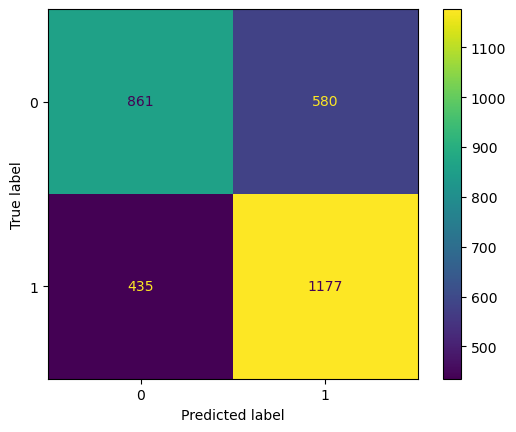

In [ ]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_, 
                             )
disp.plot(values_format='');

The model is almost twice as likely to predict a false positive than it is to predict a false negative. Therefore, type I errors are more common. This is less desirable, because it's better for a driver to be pleasantly surprised by a generous tip when they weren't expecting one than to be disappointed by a low tip when they were expecting a generous one. However, the overall performance of this model is excellent. 

## 3.4.2 Feature importance

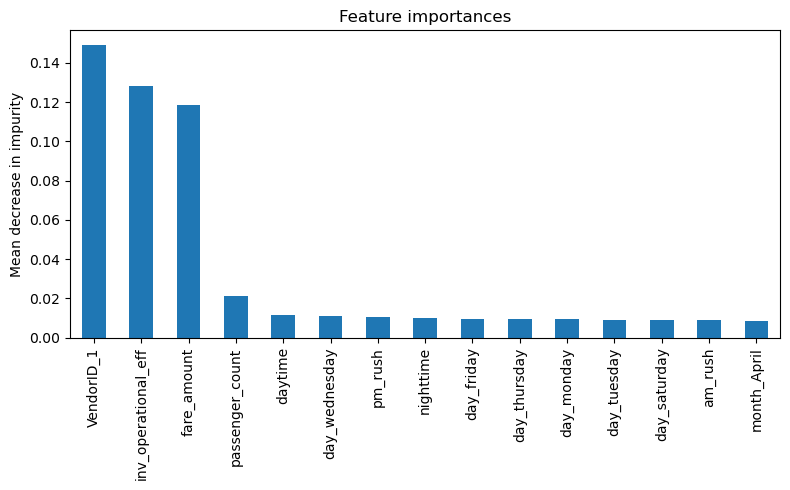

In [ ]:
importances = rf1.best_estimator_.feature_importances_
xgb_importances = pd.Series(importances, index=X_test.columns)
xgb_importances = xgb_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
xgb_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

In [ ]:
xgb_importances

VendorID_1             0.149198
inv_operational_eff    0.128228
fare_amount            0.118501
passenger_count        0.021128
daytime                0.011486
day_wednesday          0.011008
pm_rush                0.010246
nighttime              0.010137
day_friday             0.009654
day_thursday           0.009633
day_monday             0.009454
day_tuesday            0.009039
day_saturday           0.008920
am_rush                0.008844
month_April            0.008287
dtype: float64

# **4. Execute**


## **Conclusion**

In this step, use the results of the models above to formulate a conclusion. Consider the following questions:

**Exemplar responses:**
1. **Would you recommend using this model? Why or why not?**  
Yes, this is model performs acceptably. Its F<sub>1</sub> score was 0.7235 and it had an overall accuracy of 0.6865. It correctly identified ~78% of the actual responders in the test set, which is 48% better than a random guess. It may be worthwhile to test the model with a select group of taxi drivers to get feedback.  


2. **What was your highest scoring model doing? Can you explain how it was making predictions?**   
Unfortunately, random forest is not the most transparent machine learning algorithm. We know that `VendorID`, `predicted_fare`, `mean_duration`, and `mean_distance` are the most important features, but we don't know how they influence tipping. This would require further exploration. It is interesting that `VendorID` is the most predictive feature. This seems to indicate that one of the two vendors tends to attract more generous customers. It may be worth performing statistical tests on the different vendors to examine this further.  


3. **Are there new features that you can engineer that might improve model performance?**  
There are almost always additional features that can be engineered, but hopefully the most obvious ones were generated during the first round of modeling. In our case, we could try creating three new columns that indicate if the trip distance is short, medium, or far. We could also engineer a column that gives a ratio that represents (the amount of money from the fare amount to the nearest higher multiple of \\$5) / fare amount. For example, if the fare were \\$12, the value in this column would be 0.25, because \\$12 to the nearest higher multiple of \\$5 (\\$15) is \\$3, and \\$3 divided by \\$12 is 0.25. The intuition for this feature is that people might be likely to simply round up their tip, so journeys with fares with values just under a multiple of \\$5 may have lower tip percentages than those with fare values just over a multiple of \\$5. We could also do the same thing for fares to the nearest \\$10.

$$
round5\_ratio = \frac{amount\ of\ money\ from\ the\ fare\ amount\ to\ the\ nearest\ higher\ multiple\ of\ \$5}{fare\ amount}
$$
